# Multidimensional interpolation with radial basis functions

https://en.wikipedia.org/wiki/Radial_basis_function
https://en.wikipedia.org/wiki/Radial_basis_function_kernel  
https://www.youtube.com/watch?v=_cJLVhdj0j4&t=43s  
https://www.youtube.com/watch?v=bPmj4byYbhg&t=67s  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html  
https://stackoverflow.com/questions/47364660/how-to-use-scipy-interpolate-rbf-in-n-dimensions  
http://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html  
 
        
        

A radial basis function (RBF) is a real-valued function whose value depends only on the distance from the origin, so that 
$\ \phi \left(\mathbf {x} \right)=\phi \left(\left\|\mathbf {x} \right\|\right))$; 
or alternatively on the distance from some other point $\textstyle \mathbf {c}$, called a center, 
$\phi \left(\mathbf {x} ,\mathbf {c} \right)=\phi \left(\left\|\mathbf {x} -\mathbf {c} \right\|\right)$.
Any function $\phi$ that satisfies the property $\phi \left(\mathbf {x} \right)=\phi \left(\left\|\mathbf {x} \right\|\right)$ is a radial function. The norm is usually Euclidean distance, although other distance functions are also possible.

Sums of radial basis functions are typically used to approximate given functions. This approximation process can also be interpreted as a simple kind of neural network; this was the context in which they originally surfaced, in work by David Broomhead and David Lowe in 1988, which stemmed from Michael J. D. Powell's seminal research from 1977.  RBFs are also used as a kernel in support vector classification.

`class scipy.interpolate.Rbf(*args)` provides a multidimensional interpolation function that uses any of the following radial base functions (`multiquadric` is default):

    `function=`
    'multiquadric': sqrt((r/self.epsilon)**2 + 1)
    'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
    'gaussian': exp(-(r/self.epsilon)**2)
    'linear': r
    'cubic': r**3
    'quintic': r**5
    'thin_plate': r**2 * log(r)
    
You can also set the smoothness of the fit, see the documentation. See also here https://github.com/scipy/scipy/issues/4523


In [43]:
import numpy as np
from scipy.interpolate import Rbf
from scipy.interpolate import InterpolatedUnivariateSpline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

% matplotlib inline

In [5]:
# from scipy docs
# pass node coordinates as separate values in function call
x, y, z, d = np.random.rand(4, 50)
rbfi = Rbf(x, y, z, d)  # radial basis function interpolator instance
xi = yi = zi = np.linspace(0, 1, 20)
rbfi(xi, yi, zi)   # interpolated values


array([ 0.23278761,  0.48654801,  0.76201919,  1.04843271,  1.2890371 ,
        1.36959829,  1.21004992,  0.8721696 ,  0.52896523,  0.3281435 ,
        0.31786833,  0.46831343,  0.67137754,  0.77029435,  0.67862815,
        0.45148176,  0.21607694,  0.04810765, -0.05781796, -0.12997153])

In the following example the input is five-dimensional and unpacked by the `*` in the function call.

Note that because of the unpacking the first dimension's values are `[ 0  1  2  3  4]`, the second are `[ 5  6  7  8  9]`, and the values at the nodes are `[25 26 27 28 29]`.  One would intuitively want the dimensions and values to be the columns in the input array, but it is in fact the rows, because of the unpacking.

In [35]:
# https://pythontips.com/2013/08/04/args-and-kwargs-in-python-explained/ 
def testArgs(row,*argv):
    return argv[row]

In [36]:
# from stackoverflow answer
# pass node coordinates as unpacked values in function call
a = np.arange(30)
a = a.reshape((6,5))    
print(a)
print('------------')
row = 0
print(f'{row}th dimension: {testArgs(0,*a)}')
print('------------')
f = Rbf(*a)    
o = f((2,3),(7,8),(12,13),(17,18),(22,23))
print(o)
print('------------')
x = np.array((4,9,14,19,24))
o = f(*x)
print(o)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
------------
0th dimension: [0 1 2 3 4]
------------
[ 27.  28.]
------------
29.0


## Using radial basis functions for smoothing/interpolation

http://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html



Radial basis functions can be used for smoothing/interpolating scattered data in n-dimensions, but should be used with caution for extrapolation outside of the observed data range.

### 1-D example

This example compares the usage of the Rbf and UnivariateSpline classes from the scipy.interpolate module.


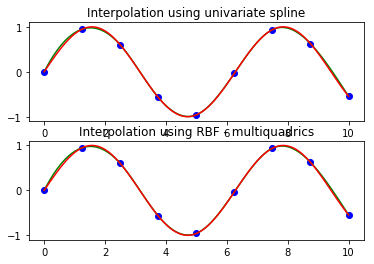

In [44]:
# setup data
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

# use fitpack2 method
ius = InterpolatedUnivariateSpline(x, y)
yi = ius(xi)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')

# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.savefig('rbf1d.png')

### 2-D example

This example shows how to interpolate scattered 2d data. The dots are the input values.

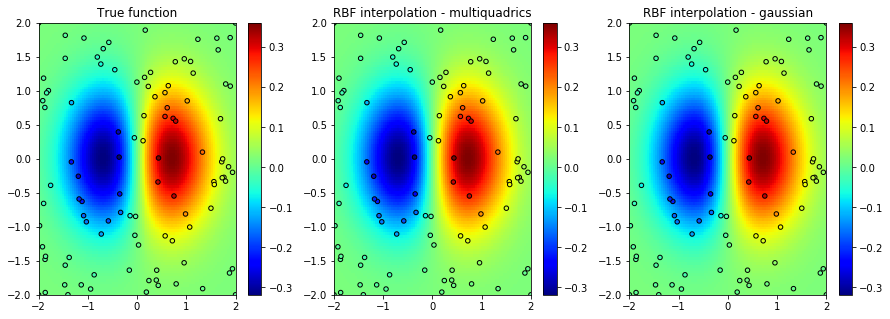

In [109]:
# 2-d tests - setup scattered data
def pfunc(x,y):
    return x*np.exp(-x**2-y**2)

numpoint = 100
x = np.random.rand(numpoint)*4.0-2.0
y = np.random.rand(numpoint)*4.0-2.0
x = np.append(x,[-2,-2,2, 2])
y = np.append(y,[-2, 2,2,-2])
z = pfunc(x,y)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
Zmq = rbf(XI, YI)
rbf = Rbf(x, y, z, function='gaussian',epsilon=1)
Zg = rbf(XI, YI)

# actual curve
Z = pfunc(XI, YI)

# plot the result
# n = plt.Normalize(-2., 2.)
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pcolor(XI, YI, Z, cmap=cm.jet)
plt.scatter(x, y, 20, z, cmap=cm.jet,edgecolors='k')
plt.title('True function')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.pcolor(XI, YI, Zmq, cmap=cm.jet)
plt.scatter(x, y, 20, z, cmap=cm.jet,edgecolors='k')
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.pcolor(XI, YI, Zg, cmap=cm.jet)
plt.scatter(x, y, 20, z, cmap=cm.jet,edgecolors='k')
plt.title('RBF interpolation - gaussian')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.savefig('rbf2d.png')

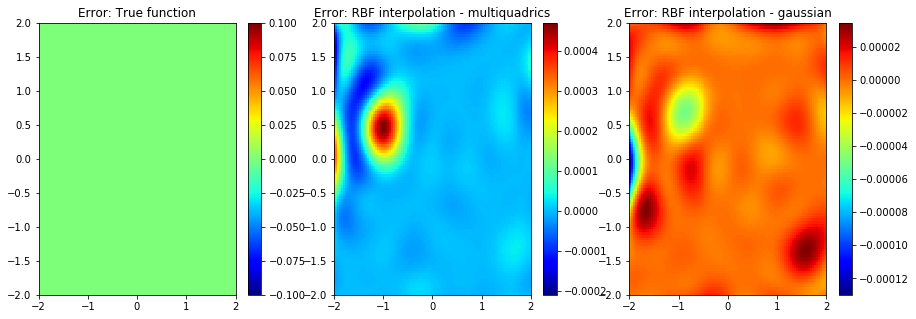

In [114]:
# n = plt.Normalize(-2., 2.)
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pcolor(XI, YI, Z-Z, cmap=cm.jet)
plt.title('Error: True function')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.pcolor(XI, YI, Z-Zmq, cmap=cm.jet)
plt.title('Error: RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.pcolor(XI, YI, Z-Zg, cmap=cm.jet)
plt.title('Error: RBF interpolation - gaussian')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

plt.savefig('rbf2delta.png')